# Web Scraping with Selenium

In [96]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from pandas.plotting import table 

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

For this project we needed to do web scraping using Selenium. In my case, I have decided to scrap the women sneakers section in Zalando Spain. I have just taken the sneakers shown in the first page of all women sneakers in Zalando.

In [2]:
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)

opciones.headless=False    

opciones.add_argument('--start-maximized')         

opciones.add_argument('user-data-dir=selenium')    

opciones.add_argument('--incognito')              

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://www.zalando.es/mujer-home/" # Website to scrap
driver.get(url)

driver.implicitly_wait(10)
driver.find_element_by_xpath('/html/body/div[9]/div[3]/div/div/div/div/div[2]/div[1]/button[2]').click() # Accepting the cookies

driver.implicitly_wait(5)
driver.find_element_by_css_selector("#z-navicat-header-root > header > div:nth-child(3) > div > div > div > div.VaE1kV.C3wGFf.JT3_zV > div > div > div > div.z-navicat-header_bottomRow > div.z-navicat-header_searchContainer > form > div > input").send_keys("zapatillas") # Searching for sneakers in the website
driver.find_element_by_css_selector("#z-navicat-header-root > header > div:nth-child(3) > div > div > div > div.VaE1kV.C3wGFf.JT3_zV > div > div > div > div.z-navicat-header_bottomRow > div.z-navicat-header_searchContainer > form > div > input").send_keys(Keys.ENTER) # Executing my search

driver.implicitly_wait(2)
# Now I want four elements from the website, so I have created 4 empty lists to include all the elements needed there
brands = [] # Sneakers brands
sneakers_model = [] # The model per brand
current_price = [] # Current price (promoted or not)
previous_price = [] # Previous price, in case it is not promoted it will give me the same price

for i in range(1,88):
    try:
        brands.append(driver.find_element_by_xpath(f"/html/body/div[4]/div/div/x-wrapper-re-1-1/div/div[7]/div/div[2]/div[2]/div[2]/div[{i}]/div[2]/article/div[4]/a/header/div[1]/span").text)
        sneakers_model.append(driver.find_element_by_xpath(f"/html/body/div[4]/div/div/x-wrapper-re-1-1/div/div[7]/div/div[2]/div[2]/div[2]/div[{i}]/div[2]/article/div[4]/a/header/div[1]/h3").text)
        current_price.append(driver.find_element_by_xpath(f"/html/body/div[4]/div/div/x-wrapper-re-1-1/div/div[7]/div/div[2]/div[2]/div[2]/div[{i}]/div[2]/article/div[4]/a/header/div[2]/span[1]").text)
        
        try:
            previous_price.append(driver.find_element_by_xpath(f"/html/body/div[4]/div/div/x-wrapper-re-1-1/div/div[7]/div/div[2]/div[2]/div[2]/div[{i}]/div[2]/article/div[4]/a/header/div[2]/span[2]").text)
            
        except:
            previous_price.append(driver.find_element_by_xpath(f"/html/body/div[4]/div/div/x-wrapper-re-1-1/div/div[7]/div/div[2]/div[2]/div[2]/div[{i}]/div[2]/article/div[4]/a/header/div[2]/span[1]").text)
            
    except:
        print('influencer') # There are pictures of influencers across the website so for those I want the system to tell me it is an influencer and go to the next product

driver.quit
    




====== WebDriver manager ======
Current google-chrome version is 95.0.4638
Get LATEST chromedriver version for 95.0.4638 google-chrome
Driver [/Users/maperezdeayalas/.wdm/drivers/chromedriver/mac64/95.0.4638.69/chromedriver] found in cache
<ipython-input-3-47c99a03d69a>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
<ipython-input-3-47c99a03d69a>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('/html/body/div[9]/div[3]/div/div/div/div/div[2]/div[1]/button[2]').click()
<ipython-input-3-47c99a03d69a>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#z-navicat-header-root > header > div:nth-child(3) > div > div > div > div.VaE1kV.C3wGFf.JT3_zV > div > div > div > div.z-navicat-header_bottomRow > div.z-navicat-hea

influencer
influencer
influencer


<bound method ChromiumDriver.quit of <selenium.webdriver.chrome.webdriver.WebDriver (session="055b91a842706b26fb008ccc7dcc3fb2")>>

Now I check that all my lists have the same length

In [4]:
len(brands)

84

In [5]:
len(sneakers_model)

84

In [6]:
len(current_price)

84

In [7]:
len(previous_price)

84

Now I can move into creating my dataframes with Pandas, creating a table with 4 columns, once for each list I have created

In [8]:
df = pd.DataFrame(brands, sneakers_model).reset_index()

In [10]:
df.columns = ['Model', 'Brand']

In [12]:
df.sample()

,Model,Brand
72,CRATER IMPACT - Zapatillas - black/iron grey/o...,Nike Sportswear


In [14]:
df['Current Price'] = current_price
df.sample()

,Model,Brand,Current Price
21,LOW CUT SNEAKER - Zapatillas - white,Tommy Jeans,"desde 37,45 €"


In [16]:
df['Previous Price'] = previous_price
df.sample()

,Model,Brand,Current Price,Previous Price
32,MID SKOOL 37 UNISEX - Zapatillas altas - black...,Vans,"79,95 €","79,95 €"


In [36]:
df.head(5)

,Model,Brand,Current Price,Previous Price
0,REEBOK HIIT TR - Zapatillas de entrenamiento -...,Reebok,"29,95 €","99,95 €"
1,RUNNER 4.0 - Zapatillas de running neutras - c...,Reebok,"24,95 €","49,95 €"
2,AIR FORCE 1 SHADOW - Zapatillas - white,Nike,"109,95 €","109,95 €"
3,ENERGYLUX 2.0 - Zapatillas de running neutras ...,Reebok,"desde 28,95 €","44,95 €"
4,CHUCK TAYLOR ALL STAR LIFT - Zapatillas altas ...,Converse,"desde 83,30 €","85,00 €"


In [17]:
df['Brand'].value_counts()

Nike Sportswear           21
Converse                  11
Nike Performance          10
Reebok                     7
Vans                       7
Skechers Sport             5
Puma                       5
New Balance                4
Champion                   2
Lacoste                    2
ASICS                      1
Tommy Jeans                1
RAID                       1
The North Face             1
Pepe Jeans                 1
adidas Originals           1
MICHAEL Michael Kors       1
Monki                      1
Marks & Spencer London     1
ONLY SHOES                 1
Name: Brand, dtype: int64

In [28]:
df['Brand'].replace({'Nike Sportswear': 'Nike', 'Nike Performance': 'Nike'}, inplace=True) # Putting all Nike products into the same brand

In [29]:
df['Brand'].value_counts()

Nike                      31
Converse                  11
Reebok                     7
Vans                       7
Skechers Sport             5
Puma                       5
New Balance                4
Champion                   2
Lacoste                    2
ASICS                      1
Tommy Jeans                1
RAID                       1
The North Face             1
Pepe Jeans                 1
adidas Originals           1
MICHAEL Michael Kors       1
Monki                      1
Marks & Spencer London     1
ONLY SHOES                 1
Name: Brand, dtype: int64

Firstly I want to know the brand with more products in the first page of Zalando women skeaners. For it I am going to build a graph with just the key brands (the ones with 4 or more products in the website).

In [33]:
key_brands = df[((df['Brand'] == 'Nike') | (df['Brand'] == 'Converse') | (df['Brand'] == 'Reebok') | (df['Brand'] == 'Vans') | (df['Brand'] == 'Skechers Sport') | (df['Brand'] == 'Puma') | (df['Brand'] == 'New Balance'))]

In [37]:
key_brands.sample(3)

,Model,Brand,Current Price,Previous Price
68,SOFTRIDE SOPHIA EASY - Zapatillas de running n...,Puma,"32,45 €","64,95 €"
77,RUN STAR HIKE - Zapatillas altas - white/black,Converse,"desde 109,90 €","desde 109,90 €"
52,Zapatillas - moonbeam,New Balance,"99,95 €","99,95 €"


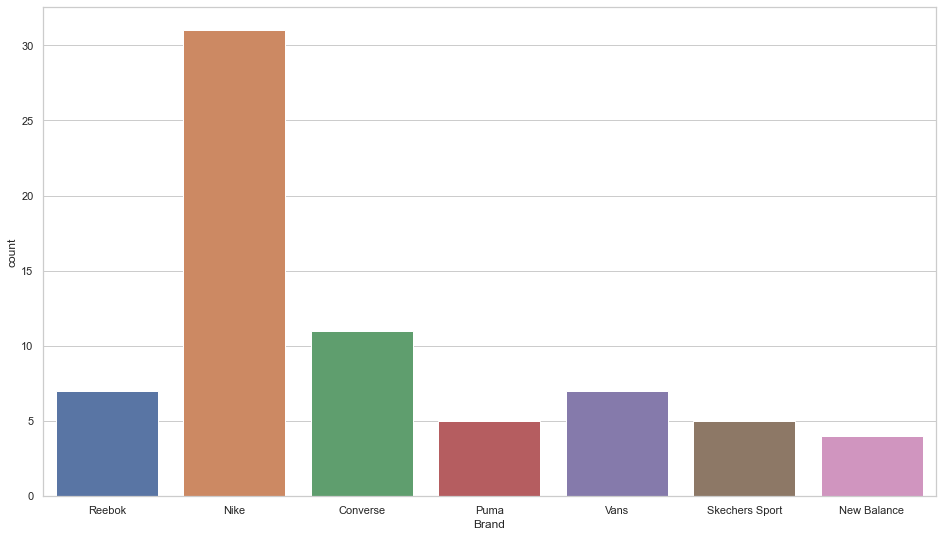

In [82]:
key_brands = sns.countplot(x = 'Brand', data = key_brands)
key_brands
key_brands.figure.savefig("key_brands_graph.jpg", dpi=1000)

Nike is the brand with more sneakers in the first page of Zalando women sneakers. It has 31 sneakers, vs Converse which is the next brand just having 11.

Secondly, I want to check how many Nike products are promoted to check if this is the main reason of Nike appearing so many times in the first page of Zalando.

In [43]:
nike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 2 to 83
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           31 non-null     object
 1   Brand           31 non-null     object
 2   Current Price   31 non-null     object
 3   Previous Price  31 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


With the current price data of the dataframe I cannot check the price differences of the products because there are strings. That is why first I need to transform the objects to numbers (floats).

In [47]:
df['Current Price'] = ['.'.join(precio.rstrip('€').split(',')) for precio in df['Current Price']]

In [51]:
df['Previous Price'] = ['.'.join(precio.rstrip('€').split(',')) for precio in df['Previous Price']]

In [52]:
df.sample(5)

,Model,Brand,Current Price,Previous Price
10,AIR FORCE 1 SHADOW - Zapatillas - sail/pink gl...,Nike,109.95,109.95
23,LOW CUT SHOE BLACK OUT - Zapatillas para camin...,Champion,44.95,44.95
16,LITE - Zapatillas de running estables - white,Reebok,25.95,39.95
42,AIR ZM SUPERREP 2 MFS - Zapatillas de entrenam...,Nike,99.95,124.95
52,Zapatillas - moonbeam,New Balance,99.95,99.95


In [53]:
df['Current Price'] = ['.'.join(precio.lstrip('desde').split(',')) for precio in df['Current Price']]

In [55]:
df['Previous Price'] = ['.'.join(precio.lstrip('desde').split(',')) for precio in df['Previous Price']]

In [58]:
df.info() # The numbers are still strings and not float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Model           84 non-null     object
 1   Brand           84 non-null     object
 2   Current Price   84 non-null     object
 3   Previous Price  84 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


In [59]:
df['Current Price'] = pd.to_numeric(df['Current Price'])

In [62]:
df['Previous Price'] = pd.to_numeric(df['Previous Price'])

In [63]:
df.info() # Now my numbers are all floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model           84 non-null     object 
 1   Brand           84 non-null     object 
 2   Current Price   84 non-null     float64
 3   Previous Price  84 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.8+ KB


As the data is all clean now I can save it in a csv

In [65]:
df.to_csv("zalando_sneakers_data.csv")

In [67]:
df['Price Difference'] = df['Current Price'] - df['Previous Price'] # If the number = 0, there is no promotion done on it

In [68]:
df

,Model,Brand,Current Price,Previous Price,Price Difference
0,REEBOK HIIT TR - Zapatillas de entrenamiento -...,Reebok,29.95,99.95,-70.00
1,RUNNER 4.0 - Zapatillas de running neutras - c...,Reebok,24.95,49.95,-25.00
2,AIR FORCE 1 SHADOW - Zapatillas - white,Nike,109.95,109.95,0.00
3,ENERGYLUX 2.0 - Zapatillas de running neutras ...,Reebok,28.95,44.95,-16.00
4,CHUCK TAYLOR ALL STAR LIFT - Zapatillas altas ...,Converse,83.30,85.00,-1.70
...,...,...,...,...,...
79,GRACEFUL - Zapatillas - gray/mint,Skechers Sport,49.95,49.95,0.00
80,WL574 - Zapatillas - navy,New Balance,59.97,99.95,-39.98
81,REACT VISION - Zapatillas - washed coral/hyper...,Nike,77.95,129.95,-52.00
82,LOW CUT SHOE BOLD XS - Zapatillas de entrenami...,Champion,22.45,44.95,-22.50


In [70]:
nike = df[df['Brand'] == 'Nike']
nike.sample()

,Model,Brand,Current Price,Previous Price,Price Difference
51,INTERNATIONALIST - Zapatillas - black/dark grey,Nike,89.95,89.95,0.0


In [71]:
nike['Price Difference'].value_counts()

 0.0     13
-16.3     4
-36.0     3
-44.0     2
-39.0     1
-16.5     1
-18.0     1
-38.0     1
-25.0     1
-56.0     1
-6.0      1
-52.0     1
-21.0     1
Name: Price Difference, dtype: int64

There are 13 products with no promotion in Nike  

In [87]:
group = nike.groupby(['Price Difference']).count()
group

,Model,Brand,Current Price,Previous Price
Price Difference,,,,
-56.0,1,1,1,1
-52.0,1,1,1,1
-44.0,2,2,2,2
-39.0,1,1,1,1
-38.0,1,1,1,1
-36.0,3,3,3,3
-25.0,1,1,1,1
-21.0,1,1,1,1
-18.0,1,1,1,1


In [99]:
group.to_csv("nike_discount_products.csv")

More than half of Nike products are discounted.

Thirdly, let's see of this is the same for the total products.

In [101]:
products = df.groupby(['Price Difference']).count()
products

,Model,Brand,Current Price,Previous Price
Price Difference,,,,
-70.00,1,1,1,1
-56.00,1,1,1,1
-52.00,1,1,1,1
-47.00,1,1,1,1
-44.00,2,2,2,2
-39.98,1,1,1,1
-39.00,1,1,1,1
-38.00,1,1,1,1
-37.50,1,1,1,1


Out of 84 products, 51 of them are discounted, 61% of them.

Now let's see what the average discount depth of the products. 

In [77]:
discount = df.loc[df['Price Difference'] != 0.00]
len(discount)

51

<AxesSubplot:xlabel='Price Difference', ylabel='Count'>

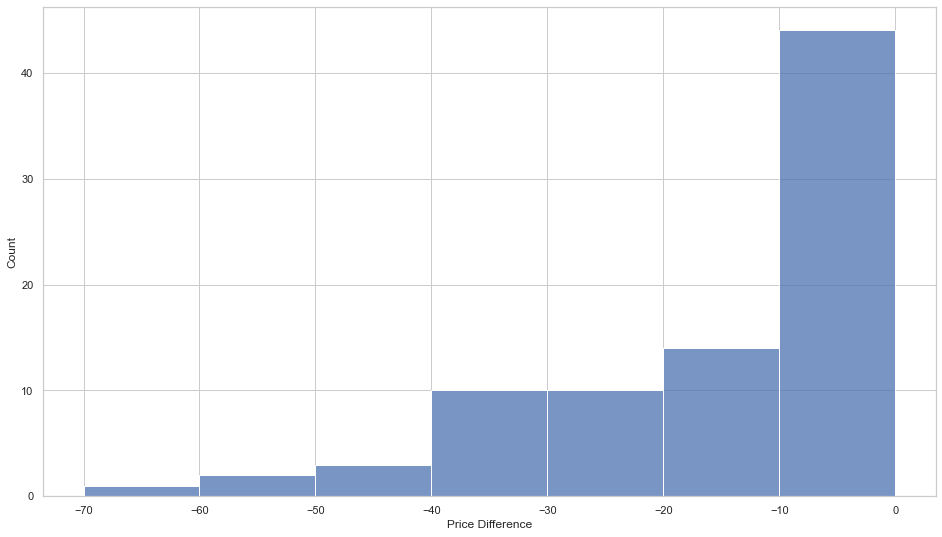

In [90]:
discounts_graph = sns.histplot(x = df['Price Difference'], bins = 7)
discounts_graph

In [91]:
discounts_graph.figure.savefig("discounts_graph.jpg", dpi=1000)

Most of the discounts are between 0 - 10 euros.

Finally let's see which is the product with the deepest discount.

In [81]:
deepest_discount = df.loc[df['Price Difference'] == -70.00]
deepest_discount

,Model,Brand,Current Price,Previous Price,Price Difference
0,REEBOK HIIT TR - Zapatillas de entrenamiento -...,Reebok,29.95,99.95,-70.0


In [92]:
deepest_discount.to_csv('deepest_discount.csv')

Reebok is the brand offering the product with the deepest discount.